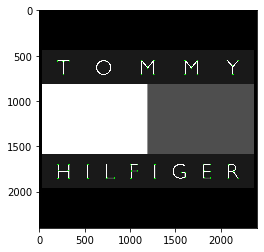

(<matplotlib.image.AxesImage at 0x129395a50>, None)

In [44]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('logos/tommyhilfiger.png',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [137]:
#BF + ORB

img1 = cv.imread('logos/petronas_small.png',0)          # queryImage
img2 = cv.imread('logos/merc1.jpg',0) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

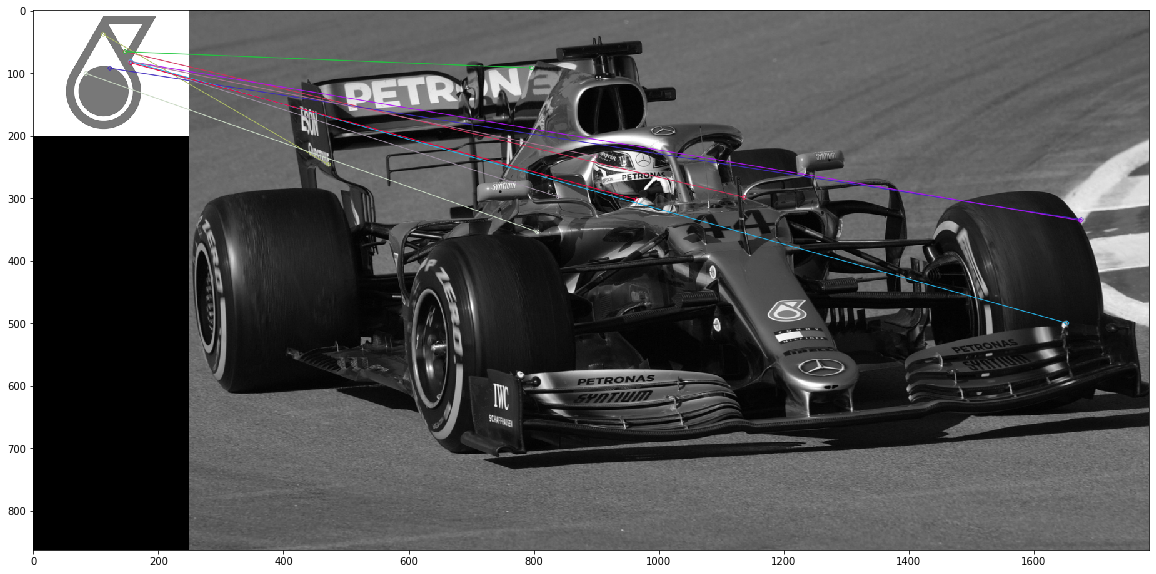

52.0
54.0
56.0
58.0
64.0
66.0
67.0
68.0
72.0
72.0
73.0
76.0
80.0
81.0
81.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [138]:
#plot img3
plt.figure(figsize = (20,20))
plt.imshow(img3),plt.show()
[print(str(m.distance)) for m in matches]

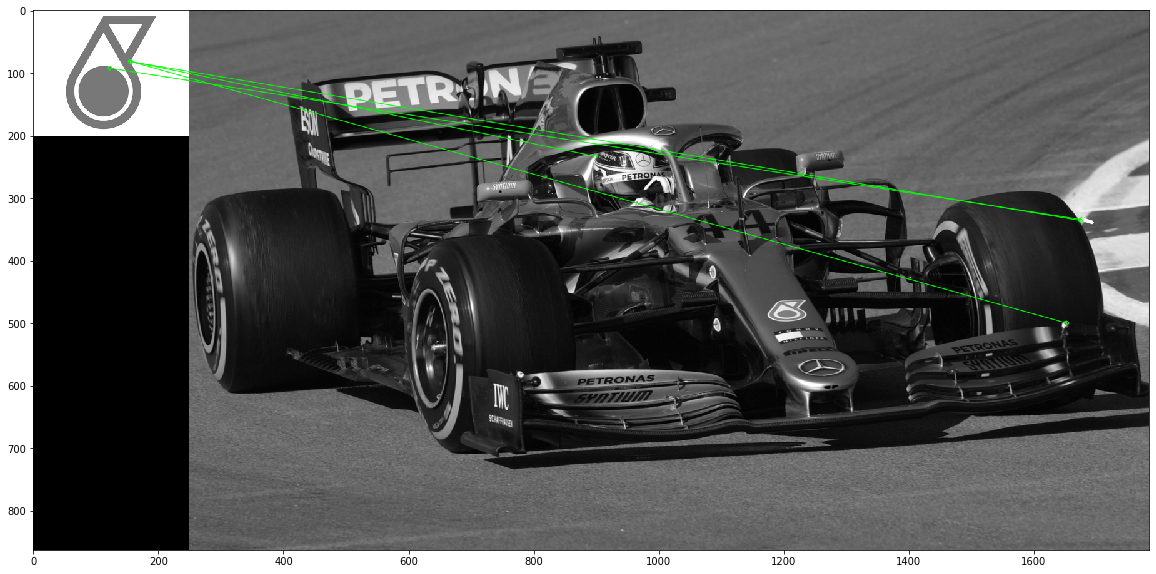

(<matplotlib.image.AxesImage at 0x12bf583d0>, None)

In [139]:
#Homography

src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv.perspectiveTransform(pts,M)
img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.figure(figsize = (20,20))
plt.imshow(img3, 'gray'),plt.show()

119


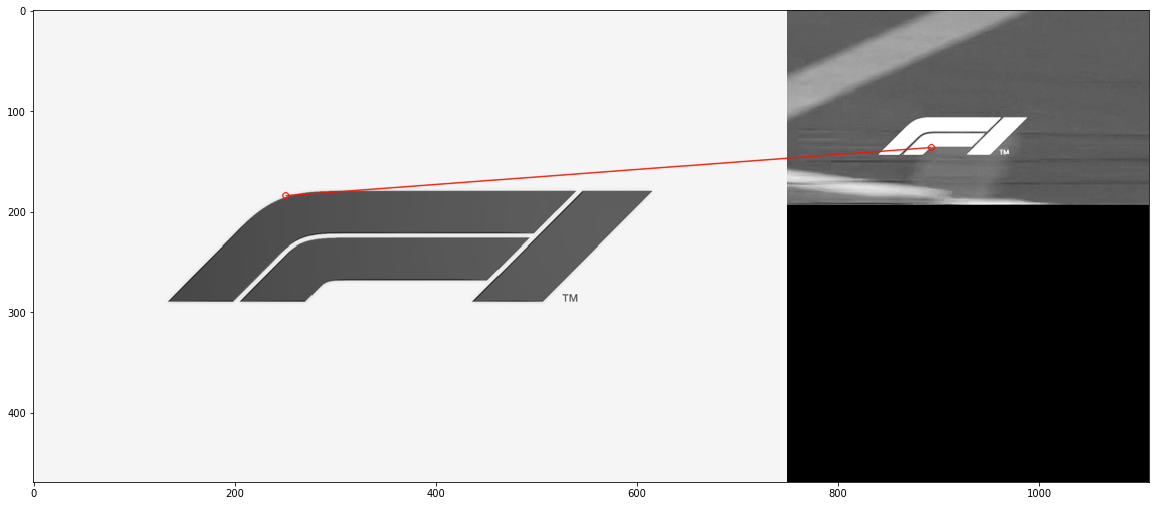

(<matplotlib.image.AxesImage at 0x1295d0c10>, None)

In [131]:
#BF + ORB  KNN

img1 = cv.imread('logos/f1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('logos/2019osd_f1.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# BFMatcher
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1,des2,k=2) #knnMatch with k=2

# Apply ratio test
good = []
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        good.append([m])
        print(i)
#     print(str(abs(m.distance - n.distance))+ '=' + str(m.distance) + '-' + str(n.distance))
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,20))
plt.imshow(img3),plt.show()

In [132]:
#Homography
print(good)
src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv.perspectiveTransform(pts,M)
img2 = cv.polylines(img2,[np.int32(dst)],True,10,3, cv.LINE_AA)
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

flattened = [match for sub in good for match in sub]
img3 = cv.drawMatches(img1,kp1,img2,kp2, flattened,None,**draw_params)
plt.figure(figsize = (20,20))
plt.imshow(img3, 'gray'),plt.show()

[[<DMatch 0x1215a9450>]]


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/matmul.dispatch.cpp:531: error: (-215:Assertion failed) scn + 1 == m.cols in function 'perspectiveTransform'


In [125]:
 #FLANN 

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'